In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('laptopData.csv')
df = df[df.columns[1:]]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [4]:
print(f'Null Values: {df.isna().sum()}')
df = df.dropna()
print(f'Null Values: {df.isna().sum()}')

Null Values: Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64
Null Values: Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [5]:
memory = df['Memory'].str.split(' ', expand=True)[[0,1,4,5]].rename(columns={0:'Memory_1', 1:'Memory_Type_1', 4:'Memory_2', 5:'Memory_Type_2'})
df = df.join(memory).drop(columns='Memory')
df = df.fillna(np.nan)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_1,Memory_Type_1,Memory_2,Memory_Type_2
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB,SSD,NaN,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB,Flash,NaN,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB,SSD,NaN,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB,SSD,NaN,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB,SSD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,128GB,SSD,NaN,NaN
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,512GB,SSD,NaN,NaN
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,64GB,Flash,NaN,NaN
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1TB,HDD,NaN,NaN


In [6]:
df['Memory_Size_1'] = np.where(df['Memory_1'].str.endswith('TB'), 1, 0)
df['Memory_Size_2'] = np.where(df['Memory_2'].str.endswith('TB'), 1, 0)

df['Memory_1'] = df['Memory_1'].str[:-2].replace('', np.nan).astype(float)
df['Memory_2'] = df['Memory_2'].str[:-2].replace('', np.nan).astype(float)

df.loc[df['Memory_Size_1'] == 1, 'Memory_1'] *= 1000
df.loc[df['Memory_Size_2'] == 1, 'Memory_2'] *= 1000

df = df.drop(columns=['Memory_Size_1', 'Memory_Size_2'])


In [7]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_1,Memory_Type_1,Memory_2,Memory_Type_2
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128.0,SSD,NaN,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128.0,Flash,NaN,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256.0,SSD,NaN,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512.0,SSD,NaN,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256.0,SSD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,128.0,SSD,NaN,NaN
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,512.0,SSD,NaN,NaN
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,64.0,Flash,NaN,NaN
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1000.0,HDD,NaN,NaN


In [8]:
# print(df['Weight'].unique())
df['Weight'] = df['Weight'].str[:-2].replace('',np.nan).astype(float)

df['Ram'] = df['Ram'].str[:-2].replace('',np.nan).astype(float)

# print(df['Inches'].unique())
df['Inches'] = df['Inches'].replace('?',np.nan).astype(float)

df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_1,Memory_Type_1,Memory_2,Memory_Type_2
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,SSD,NaN,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,128.0,Flash,NaN,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,256.0,SSD,NaN,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,512.0,SSD,NaN,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256.0,SSD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,Intel HD Graphics 520,Windows 10,1.80,33992.6400,128.0,SSD,NaN,NaN
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,Intel HD Graphics 520,Windows 10,1.30,79866.7200,512.0,SSD,NaN,NaN
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,Intel HD Graphics,Windows 10,1.50,12201.1200,64.0,Flash,NaN,NaN
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,1000.0,HDD,NaN,NaN


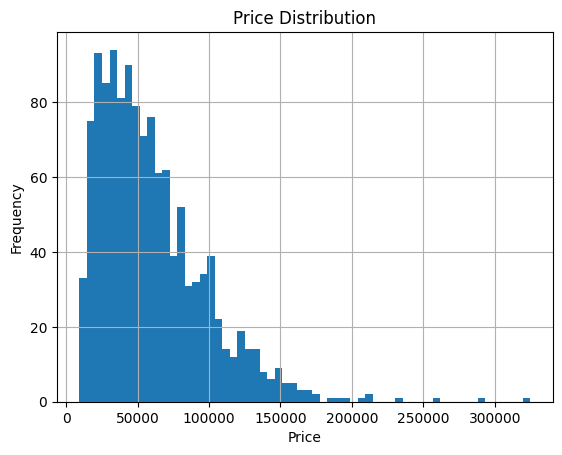

In [9]:
df['Price'].hist(bins=60)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

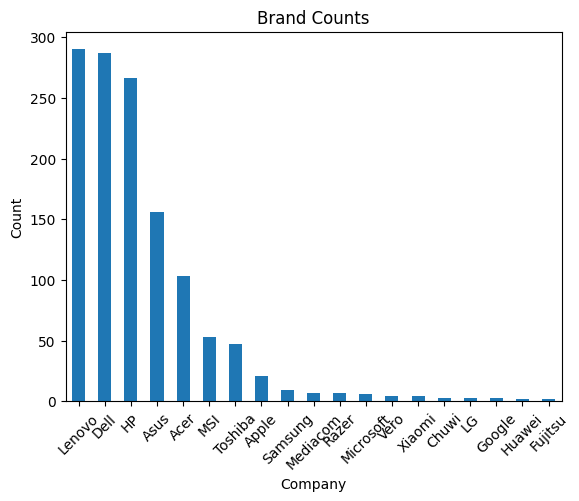

In [10]:
df['Company'].value_counts().plot(kind='bar')
plt.title("Brand Counts")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Ram', ylabel='Price'>

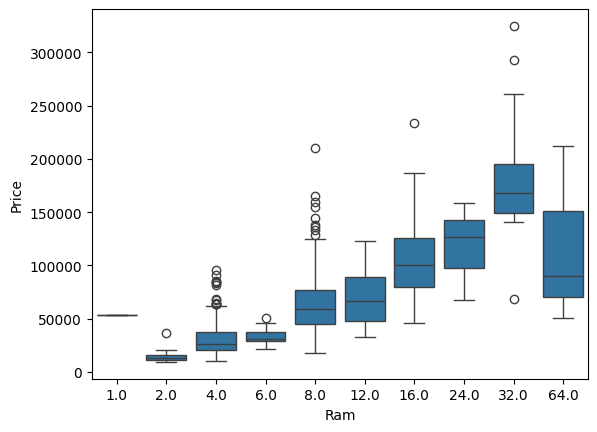

In [11]:
sns.boxplot(y='Price', x='Ram', data=df.sort_values(by='Ram'))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

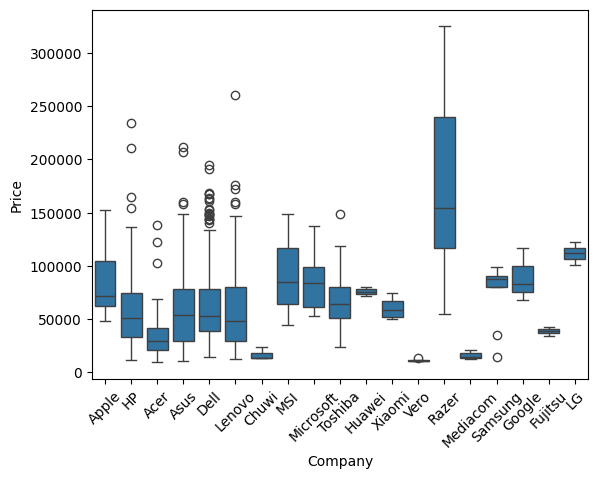

In [12]:
sns.boxplot(x='Company', y='Price', data=df)
plt.xticks(rotation=45)

<Axes: ylabel='Company'>

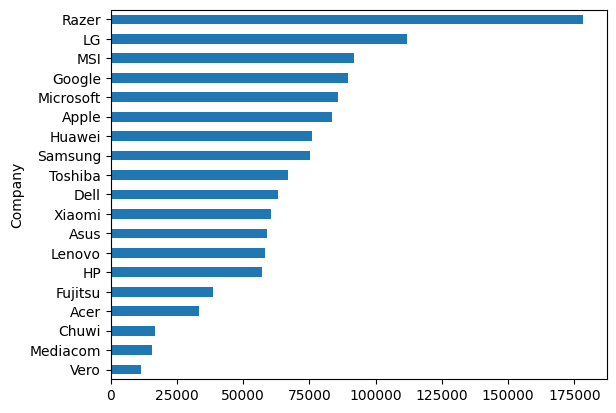

In [13]:
df.groupby('Company')['Price'].mean().sort_values().plot(kind='barh')


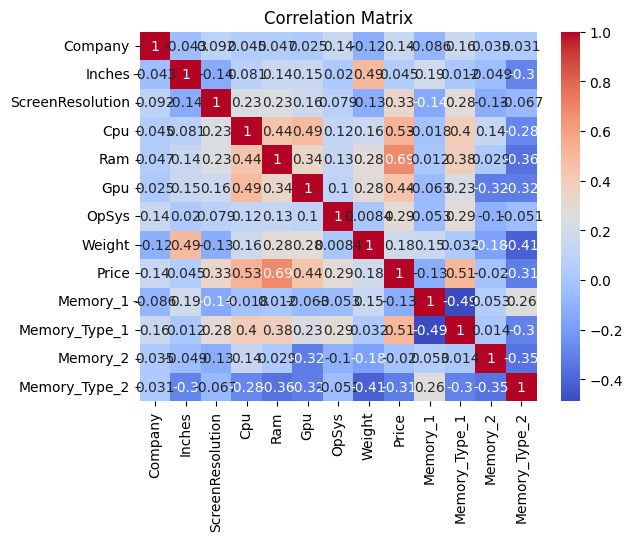

In [14]:
categorical_columns = ['Company','Cpu', 'Gpu', 'OpSys', 'Memory_Type_1', 'Memory_Type_2','ScreenResolution']
df_copy = df.copy()
for column in categorical_columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])

corr_matrix = df_copy.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [15]:
df = df.drop(['TypeName','Memory_2','Memory_Type_2','Company'], axis=1)

In [16]:
df = df.fillna('Unkown')
df_encoded = pd.get_dummies(df, drop_first=True)

In [17]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):,.0f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):,.0f}")


R² Score: 0.7985
Mean Absolute Error: 9,938
Root Mean Squared Error: 17,750


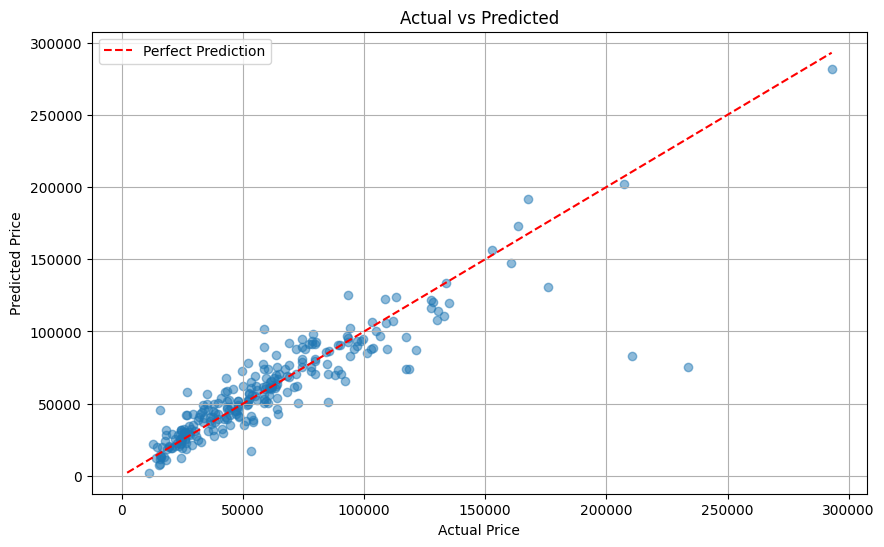

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()